In [1]:
# plot the block intervals 
# imports
import os.path
import pandas as pd
import matplotlib.pyplot as plt

# load log file's name
with open('./target.txt', 'r') as target_file:
    target = target_file.read()

# form parsed data file name
def gen_csv_path(log_type):
    return './data/' + target + '.' + log_type + '.csv'
    
# read $target.tmCommit as dataframe
df_commit = pd.read_csv(gen_csv_path("tmCommit"))
cost = df_commit[['height', 'block_cost']]

# read $target.tmEndblocker as dataframe
df_endblocker = pd.read_csv(gen_csv_path("tmEndBlocker"))
cost = pd.merge(cost, df_endblocker.groupby('height')['endblocker_cost'].sum(), on='height', how='left')

# read $target.tmHandler as dataframe
if os.path.exists(gen_csv_path("tmHandler")):
    df_handler = pd.read_csv(gen_csv_path("tmHandler"))
    cost = pd.merge(cost, df_handler.groupby('height')['handler_cost'].sum(), on='height', how='left')
    
# read $target.tmQuerier as dataframe
if os.path.exists(gen_csv_path("tmQuerier")):
    df_handler = pd.read_csv(gen_csv_path("tmQuerier"))
    cost = pd.merge(cost, df_handler.groupby('height')['querier_cost'].sum(), on='height', how='left')   

# read $target.tmErr as dataframe
if os.path.exists(gen_csv_path("tmErr")):
    df_err = pd.read_csv(gen_csv_path("tmErr"))
    cost = pd.merge(cost, df_err.groupby('height')['stamp'].count(), on='height', how='left')
    cost = cost.rename(columns={'stamp':'err_count'})

# is this necessary?
cost.fillna(0, inplace=True)
print(cost.head(5))
print(cost.tail(5))
    
# plot
cost.plot(x='height', figsize=(20,10))

plt.legend()
plt.savefig('./' + target + '.png')

   height  block_cost  endblocker_cost  handler_cost  err_count
0  765472        5475             1737          40.0        0.0
1  765473        5494             1848         103.0        0.0
2  765474        4663             1156          41.0        0.0
3  765475        7435             1521          82.0        0.0
4  765476        5265             1573           0.0        0.0
       height  block_cost  endblocker_cost  handler_cost  err_count
13371  778843        6088             1270          82.0        0.0
13372  778844        7940             1016          87.0        1.0
13373  778845       10121             1289         173.0        0.0
13374  778846        6059             1722          85.0        0.0
13375  778847        4959             1428          41.0        0.0


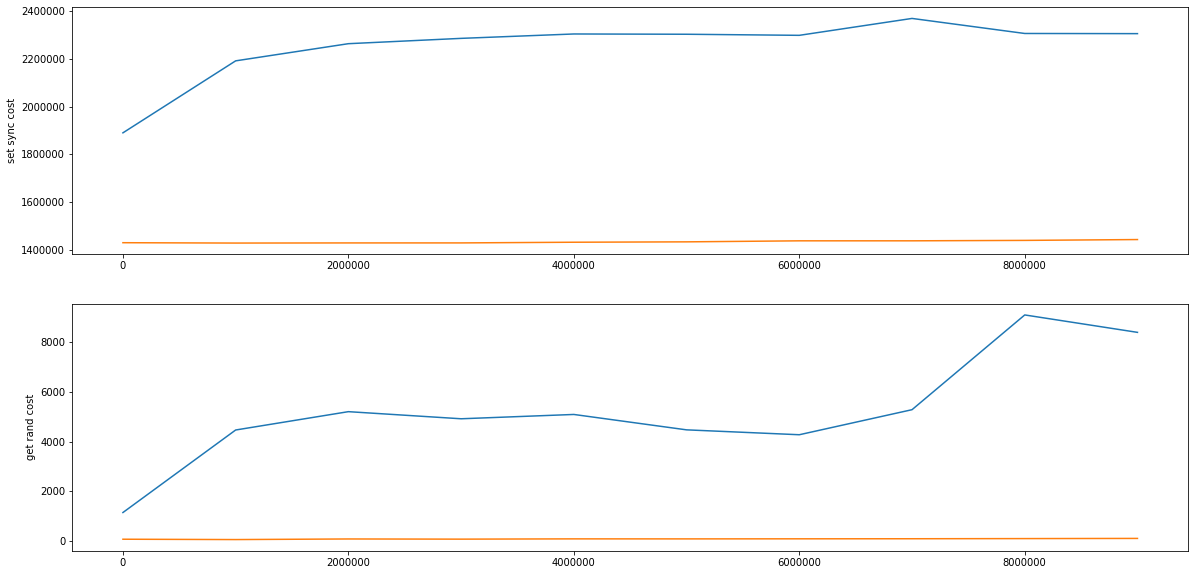

In [12]:
# plot the block intervals 
# imports
import os.path
import pandas as pd
import matplotlib.pyplot as plt

# load log file's name
with open('./target.txt', 'r') as target_file:
    target = target_file.read()

# form parsed data file name
def gen_csv_path(log_type):
    return './data/' + target + '.' + log_type + '.csv'

# read $target.setSync as dataframe
df_set = pd.read_csv(gen_csv_path("setSync"))
df_set_fsdb = df_set.loc[(df_set['backend'] == "direct_fsdb") & (df_set['existing'] <= 9000000)]
df_set_goleveldb = df_set.loc[(df_set['backend'] == "direct_goleveldb") & (df_set['existing'] <= 9000000)]

plt.figure(figsize=(20, 10))

plt.subplot(2, 1, 1)
plt.plot(df_set_fsdb['existing'], df_set_fsdb['cost'])
plt.plot(df_set_goleveldb['existing'], df_set_goleveldb['cost'])
plt.ylabel('set sync cost')

# read $target.getRand as dataframe
df_get = pd.read_csv(gen_csv_path("getRand"))

df_get_fsdb = df_get.loc[(df_get['backend'] == "direct_fsdb") & (df_get['existing'] <= 9000000)]
df_get_goleveldb = df_get.loc[(df_get['backend'] == "direct_goleveldb") & (df_get['existing'] <= 9000000)]

plt.subplot(2, 1, 2)
plt.plot(df_get_fsdb['existing'], df_get_fsdb['cost'])
plt.plot(df_get_goleveldb['existing'], df_get_goleveldb['cost'])
plt.ylabel('get rand cost')

#plt.legend()
plt.savefig('./' + target + '.png')